# Load Required Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Load Dataset

In [2]:
# import dataset saved from task 1
anz_data = pd.read_csv('ANZ_data_clean.csv')
anz_data.head()

,status,card_present_flag,txn_description,merchant_id,balance,date,gender,age,merchant_suburb,merchant_state,transaction_date_time,amount,customer_id,movement,customer_longitude,customer_latitude,merchant_longitude,merchant_latitude
0,authorized,1,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,CUS-2487424745,debit,153.41,-27.95,153.38,-27.99
1,authorized,0,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,CUS-2487424745,debit,153.41,-27.95,151.21,-33.87
2,authorized,1,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,CUS-2142601169,debit,151.23,-33.94,151.21,-33.87
3,authorized,1,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,CUS-1614226872,debit,153.10,-27.66,153.05,-26.68
4,authorized,1,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,CUS-2487424745,debit,153.41,-27.95,153.44,-28.06


# Calculate Annual Salaries

In [3]:
# compute total salary received in 3 months for each customers
salary_data = anz_data[anz_data['txn_description'] == 'PAY/SALARY'].groupby(['customer_id', 'gender', 'age']).amount.sum().reset_index()
salary_data.head()

,customer_id,gender,age,amount
0,CUS-1005756958,F,53,12616.11
1,CUS-1117979751,M,21,25050.55
2,CUS-1140341822,M,28,11499.06
3,CUS-1147642491,F,34,22248.07
4,CUS-1196156254,F,34,27326.11


In [4]:
# calculating annual salary (multiply salary received in 3 months with 4)
salary_data = salary_data.assign(amount=salary_data['amount'] * 4)

salary_data = salary_data.rename(columns = {'amount' : 'annual_salary'})

salary_data.head()

,customer_id,gender,age,annual_salary
0,CUS-1005756958,F,53,50464.44
1,CUS-1117979751,M,21,100202.20
2,CUS-1140341822,M,28,45996.24
3,CUS-1147642491,F,34,88992.28
4,CUS-1196156254,F,34,109304.44


# Feature Creation

From the existing data let us create some additional features to 'age' and 'gender' which could help us predict the annual salary of the customer.

The below are the additional features created based on the existing variables:
* Average Purchase Amount
* Minimum Purchase Amount
* Maximum Purchase Amount
* Average Number of Purchases made in a month
* Average Balance

In [5]:
# calculate average purchase amount for each customer
avg_purchase_amount = anz_data[anz_data['txn_description'].isin(['POS', 'SALES-POS'])].groupby(['customer_id']).amount.mean().reset_index()
avg_purchase_amount = avg_purchase_amount.rename(columns = {'amount' : 'avg_purchase_amount'})
avg_purchase_amount.head()

,customer_id,avg_purchase_amount
0,CUS-1005756958,37.726250
1,CUS-1117979751,76.458077
2,CUS-1140341822,67.531385
3,CUS-1147642491,51.128289
4,CUS-1196156254,30.310491


In [6]:
# calculate minimum purchase amount for each customer
min_purchase_amount = anz_data[anz_data['txn_description'].isin(['POS', 'SALES-POS'])].groupby(['customer_id']).amount.min().reset_index()
min_purchase_amount = min_purchase_amount.rename(columns = {'amount' : 'min_purchase_amount'})
min_purchase_amount.head()

,customer_id,min_purchase_amount
0,CUS-1005756958,6.48
1,CUS-1117979751,5.64
2,CUS-1140341822,4.09
3,CUS-1147642491,8.78
4,CUS-1196156254,3.66


In [7]:
# calculate maximum purchase amount for each customer
max_purchase_amount = anz_data[anz_data['txn_description'].isin(['POS', 'SALES-POS'])].groupby(['customer_id']).amount.max().reset_index()
max_purchase_amount = max_purchase_amount.rename(columns = {'amount' : 'max_purchase_amount'})
max_purchase_amount.head()

,customer_id,max_purchase_amount
0,CUS-1005756958,226.82
1,CUS-1117979751,2885.85
2,CUS-1140341822,1271.46
3,CUS-1147642491,432.92
4,CUS-1196156254,390.67


In [8]:
# calculate average number of purchases made by customer each month
num_of_purchases = anz_data[anz_data['txn_description'].isin(['POS', 'SALES-POS'])].groupby(['customer_id']).amount.count().reset_index()
num_of_purchases = num_of_purchases.assign(amount= num_of_purchases['amount'] / 3)
num_of_purchases['amount'] = num_of_purchases['amount'].astype(int)
num_of_purchases = num_of_purchases.rename(columns = {'amount' : 'avg_monthly_purchases'})
num_of_purchases.head()

,customer_id,avg_monthly_purchases
0,CUS-1005756958,16
1,CUS-1117979751,17
2,CUS-1140341822,21
3,CUS-1147642491,25
4,CUS-1196156254,54


In [9]:
# calculate average balance for each customer
avg_balance = anz_data.groupby(['customer_id']).balance.mean().reset_index()
avg_balance = avg_balance.rename(columns = {'balance' : 'avg_balance'})
avg_balance.head()

,customer_id,avg_balance
0,CUS-1005756958,2275.852055
1,CUS-1117979751,9829.929000
2,CUS-1140341822,5699.212250
3,CUS-1147642491,9032.841186
4,CUS-1196156254,22272.433755


# Combine all features into one dataset

In [10]:
# merging salary_data and other dataframes created during Feature Creation
final_data = pd.merge(salary_data, avg_purchase_amount, on='customer_id', how='inner')
final_data = pd.merge(final_data, min_purchase_amount, on='customer_id', how='inner')
final_data = pd.merge(final_data, max_purchase_amount, on='customer_id', how='inner')
final_data = pd.merge(final_data, num_of_purchases, on='customer_id', how='inner')
final_data = pd.merge(final_data, avg_balance, on='customer_id', how='inner')
final_data.head()

,customer_id,gender,age,annual_salary,avg_purchase_amount,min_purchase_amount,max_purchase_amount,avg_monthly_purchases,avg_balance
0,CUS-1005756958,F,53,50464.44,37.726250,6.48,226.82,16,2275.852055
1,CUS-1117979751,M,21,100202.20,76.458077,5.64,2885.85,17,9829.929000
2,CUS-1140341822,M,28,45996.24,67.531385,4.09,1271.46,21,5699.212250
3,CUS-1147642491,F,34,88992.28,51.128289,8.78,432.92,25,9032.841186
4,CUS-1196156254,F,34,109304.44,30.310491,3.66,390.67,54,22272.433755


# Explore Correlations

In [11]:
# returns correlation between only relevant variables, i.e annual salary vs any other features
def correlation(df):
    correlation = df.corr()
    correlation.drop(columns = ['annual_salary'], inplace = True)
    correlation.drop(['age', 'avg_purchase_amount', 'min_purchase_amount', 'max_purchase_amount', 'avg_monthly_purchases', 'avg_balance'], inplace = True)
    return correlation    

In [12]:
# display correlation between annual salary and other features for all customers
correlation(final_data)

,age,avg_purchase_amount,min_purchase_amount,max_purchase_amount,avg_monthly_purchases,avg_balance
annual_salary,-0.036504,-0.000346,-0.033626,0.011574,-0.058413,0.186986


In [13]:
# display correlation between annual salary and other features for all male customers
correlation(final_data[final_data['gender'] == 'M'])

,age,avg_purchase_amount,min_purchase_amount,max_purchase_amount,avg_monthly_purchases,avg_balance
annual_salary,0.007593,0.057464,-0.053716,0.104556,-0.176983,0.077251


In [14]:
# display correlation between annual salary and other features for all female customers
correlation(final_data[final_data['gender'] == 'F'])

,age,avg_purchase_amount,min_purchase_amount,max_purchase_amount,avg_monthly_purchases,avg_balance
annual_salary,-0.107625,-0.15415,-0.041724,-0.08268,0.061253,0.360151


annual salary shares very weak correlation with other attributes of the customer. The highest correlation among all is 0.187, i.e. between annual salary and customer's average balance. Although correlation is weak but it still suggests few interesting things:
* Male customer's salary tends to increase with age unlike female customers.
* Female tends spend less and save more as their salary increases unlike male customers

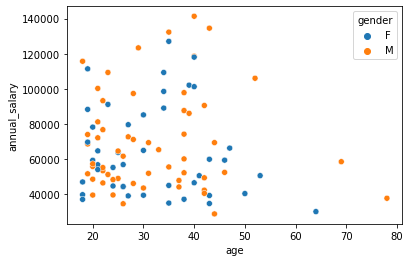

In [15]:
# explore correlation between age and annual salary
sns.scatterplot(data=final_data, x="age", y="annual_salary", hue="gender")
plt.show()

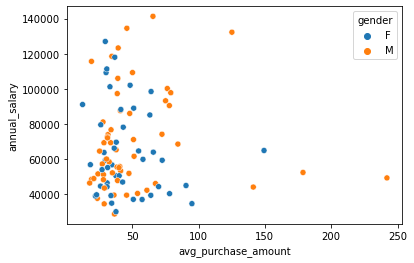

In [16]:
# explore correlation between average purchase amount and annual salary
sns.scatterplot(data=final_data, x="avg_purchase_amount", y="annual_salary", hue="gender")
plt.show()

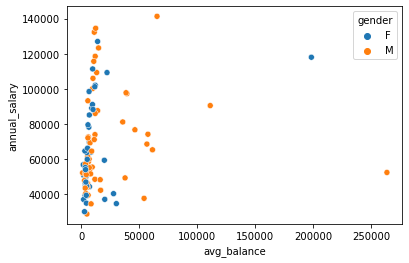

In [17]:
# explore correlation between average balance and annual salary
sns.scatterplot(data=final_data, x="avg_balance", y="annual_salary", hue="gender")
plt.show()

# Final Preprocessing

In [18]:
# remove customer_id
final_data = final_data.drop(columns = ['customer_id'])

In [19]:
final_data['gender'].unique()

array(['F', 'M'], dtype=object)

'gender' is a categorical feature, which needs to be converted numeric before fitting the model. Techniques such as 'one-hot-encoding could be used in order to do so, but for the puprose of this lets encode 'F' as 0 and 'M' as 1.

In [20]:
# encode 'M' as 1 and 'F' as 0
final_data['gender'] = final_data['gender'].replace({'F': 0, 'M': 1})
final_data.head()

,gender,age,annual_salary,avg_purchase_amount,min_purchase_amount,max_purchase_amount,avg_monthly_purchases,avg_balance
0,0,53,50464.44,37.726250,6.48,226.82,16,2275.852055
1,1,21,100202.20,76.458077,5.64,2885.85,17,9829.929000
2,1,28,45996.24,67.531385,4.09,1271.46,21,5699.212250
3,0,34,88992.28,51.128289,8.78,432.92,25,9032.841186
4,0,34,109304.44,30.310491,3.66,390.67,54,22272.433755


In [21]:
# verify data types of all variables
final_data.dtypes

gender                     int64
age                        int64
annual_salary            float64
avg_purchase_amount      float64
min_purchase_amount      float64
max_purchase_amount      float64
avg_monthly_purchases      int32
avg_balance              float64
dtype: object

In [22]:
# make sure there are no missing values
final_data.isnull().sum()

gender                   0
age                      0
annual_salary            0
avg_purchase_amount      0
min_purchase_amount      0
max_purchase_amount      0
avg_monthly_purchases    0
avg_balance              0
dtype: int64

# Train-Test split

In [23]:
X = final_data.drop(columns = ['annual_salary'])
y = final_data['annual_salary']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 3)

# Fitting Linear Regression

In [25]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [26]:
model1_pred = model1.predict(X_test)

In [27]:
metrics.mean_absolute_error(y_test, model1_pred)

20991.79353794082

In [28]:
np.sqrt(metrics.mean_squared_error(y_test, model1_pred))

25360.345616140752

# Fitting Decision Tree

In [29]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
model2_pred = model2.predict(X_test)

In [31]:
metrics.mean_absolute_error(y_test, model2_pred)

18582.264000000003

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, model2_pred))

24173.840775448494

# Summary

| **Model** | **MAE** | **RMSE**
|:----:|:----:|:----:|
| **model1 (Linear Regression Model)** | 20991.79 | 25360.34
| **model2 (Decision Tree Regressor)** | 18582.26 | 24173.84

Although Decision Tree performed better than Linear Regression, the MAE and RMSE for both the models are very high. It suggests that both the models are highly inaccurate and cannot be used by ANZ to segment customers into income brackets for reporting purpose. On hypertuning parameters the models could have performed slightly better but we cannot rely on it because the data we have is only for 100 customers. So, inorder to build more reliable models we need to come up with advance feature engineering and feature selection methods and more data to train and test the model.

If the goal is to segment customers, why not we create discrete class labels for annual salary and perform classification as it is more likely to give better results. However, more research is to be done on this part.